In [125]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
import scipy as sc
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from stargazer.stargazer import Stargazer
%matplotlib inline

In [4]:
sns.set_style(style="darkgrid")

In [2]:
pokemon = pd.read_csv("C:/Users/Kacper/Documents/Analiza statystyczna ekonometryczna w pythonie/Pokemon.csv")
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [13]:
pokemon['Total'].describe()

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='Count'>

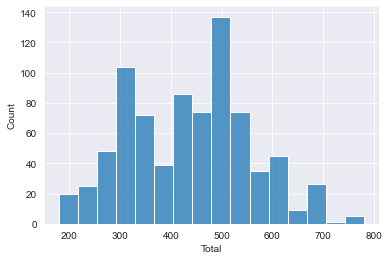

In [14]:
sns.histplot(pokemon.Total)

c:\Users\Kacper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total'>

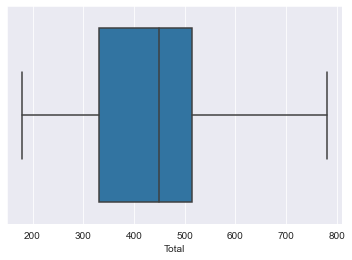

In [15]:
sns.boxplot(pokemon.Total)

In [30]:
px.pie(pokemon, names = 'Type 1')

In [29]:
px.pie(pokemon, names = 'Type 2')

In [33]:
px.density_heatmap(pokemon, x = 'Type 1', y = 'Type 2', marginal_x = 'histogram', marginal_y = 'histogram')

### Rozkład typów pokemonów na każdą generację

In [40]:
fix = px.sunburst(pokemon, path = [px.Constant('Pokemon Gen'),'Generation','Type 1'], 
    color = 'Total', color_continuous_scale='Rainbow',
                    color_continuous_midpoint=pokemon.Total.mean())
fix.update_layout(
    title_text = "Rozkład typów Pokemonów na każdą generację"
)
fix.show()

c:\Users\Kacper\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\Kacper\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\Kacper\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [53]:
fig = px.bar(pokemon , x = 'Type 1', color = 'Type 1', animation_frame = 'Generation')
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.show()

In [78]:
fig = px.scatter(pokemon, x="Type 1", y="Total", color="Type 1",
          animation_frame="Generation", animation_group="Type 2",
          hover_name = 'Name')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()

In [60]:
print(pokemon['Type 1'].isnull().sum())
print(pokemon['Type 2'].isnull().sum())

0
386


In [69]:
pokemon_legendary = pokemon[pokemon["Legendary"]>=1]
pokemon_legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Najsilniejsza legenda

In [83]:
pokemon_legendary=pokemon_legendary[pokemon.Legendary == True].sort_values('Total',ascending=False).sort_values('Total')
print(len(pokemon_legendary))

65


C:\Users\Kacper\AppData\Local\Temp\ipykernel_10248\2003105761.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [106]:
Najmocniejsze = list(pokemon_legendary.Name)[0:10]

In [112]:
print('Najmoczniejsze legendy w generacjach 1-5 to', ', '.join(Najmocniejsze),'.')

Najmoczniejsze legendy w generacjach 1-5 to Articuno, Entei, Regirock, Suicune, TornadusIncarnate Forme, Raikou, Moltres, Azelf, Registeel, Regice .


In [16]:
y = pokemon['Total']
x = pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
x = sm.add_constant(x)

In [17]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.647e+31
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:35:28   Log-Likelihood:                 22392.
No. Observations:                 800   AIC:                        -4.477e+04
Df Residuals:                     793   BIC:                        -4.474e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.611e-13   2.37e-14     11.020      0.000    2.15e-13    3.08e-13
HP             1.0000   2.76e-16   3.62e+15      0.000       1.000       1.000
Attack         1.0000   2.47e-16   4.04e+15      0.000       1.000       1.000
Defense        1.0000   2.55e-16   3.93e+15      0.000       1.000       1.000
Sp. Atk        1.0000   2.42e-16   4.14e+15      0.000       1.000       1.000
Sp. Def        1.0000   2.98e-16   3.35e+15      0.000       1.000       1.000
Speed          1.0000   2.51e-16   3.98e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       15.037   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.447
Skew:                           0.326   Prob(JB):                     0.000442
Kurtosis:                       2.805   Cond. No.                         728.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
y = pokemon_legendary['Total']
x = pokemon_legendary[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
x = sm.add_constant(x)

In [116]:
model_leg = sm.OLS(y,x).fit()
model_leg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.234e+28
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:32:37   Log-Likelihood:                 1716.5
No. Observations:                  65   AIC:                            -3419.
Df Residuals:                      58   BIC:                            -3404.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.274e-13   1.37e-12     -0.167      0.868   -2.96e-12    2.51e-12
HP             1.0000   5.19e-15   1.93e+14      0.000       1.000       1.000
Attack         1.0000   4.99e-15      2e+14      0.000       1.000       1.000
Defense        1.0000   5.29e-15   1.89e+14      0.000       1.000       1.000
Sp. Atk        1.0000    5.1e-15   1.96e+14      0.000       1.000       1.000
Sp. Def        1.0000   4.83e-15   2.07e+14      0.000       1.000       1.000
Speed          1.0000    6.1e-15   1.64e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        1.647   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                0.977
Skew:                          -0.021   Prob(JB):                        0.613
Kurtosis:                       3.599   Cond. No.                     3.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
y = pokemon['HP']
x = pokemon[['Speed','Attack','Defense','Sp. Atk','Sp. Def']]
x = sm.add_constant(x)

In [42]:
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     60.46
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           2.08e-53
Time:                        18:36:18   Log-Likelihood:                -3597.6
No. Observations:                 800   AIC:                             7207.
Df Residuals:                     794   BIC:                             7235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4832      2.829     11.127      0.000      25.929      37.037
Speed         -0.0943      0.032     -2.938      0.003      -0.157      -0.031
Attack         0.2960      0.030      9.883      0.000       0.237       0.355
Defense       -0.0840      0.033     -2.579      0.010      -0.148      -0.020
Sp. Atk        0.1101      0.031      3.579      0.000       0.050       0.170
Sp. Def        0.2644      0.037      7.125      0.000       0.192       0.337
==============================================================================
Omnibus:                      514.993   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9903.593
Skew:                           2.578   Prob(JB):                         0.00
Kurtosis:                      19.448   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
y = pokemon_legendary['HP']
x = pokemon_legendary[['Speed','Attack','Defense','Sp. Atk','Sp. Def']]
x = sm.add_constant(x)

In [118]:
model1_leg = sm.OLS(y,x).fit()
model1_leg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8952
Date:                Tue, 27 Sep 2022   Prob (F-statistic):              0.490
Time:                        19:33:45   Log-Likelihood:                -289.44
No. Observations:                  65   AIC:                             590.9
Df Residuals:                      59   BIC:                             603.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.9921     32.123      2.833      0.006      26.715     155.269
Speed         -0.1692      0.151     -1.118      0.268      -0.472       0.134
Attack         0.1947      0.122      1.590      0.117      -0.050       0.440
Defense       -0.0038      0.133     -0.028      0.977      -0.269       0.262
Sp. Atk       -0.0472      0.128     -0.369      0.713      -0.303       0.208
Sp. Def        0.0201      0.121      0.166      0.869      -0.222       0.262
==============================================================================
Omnibus:                        2.411   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.816
Skew:                           0.103   Prob(JB):                        0.403
Kurtosis:                       3.793   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


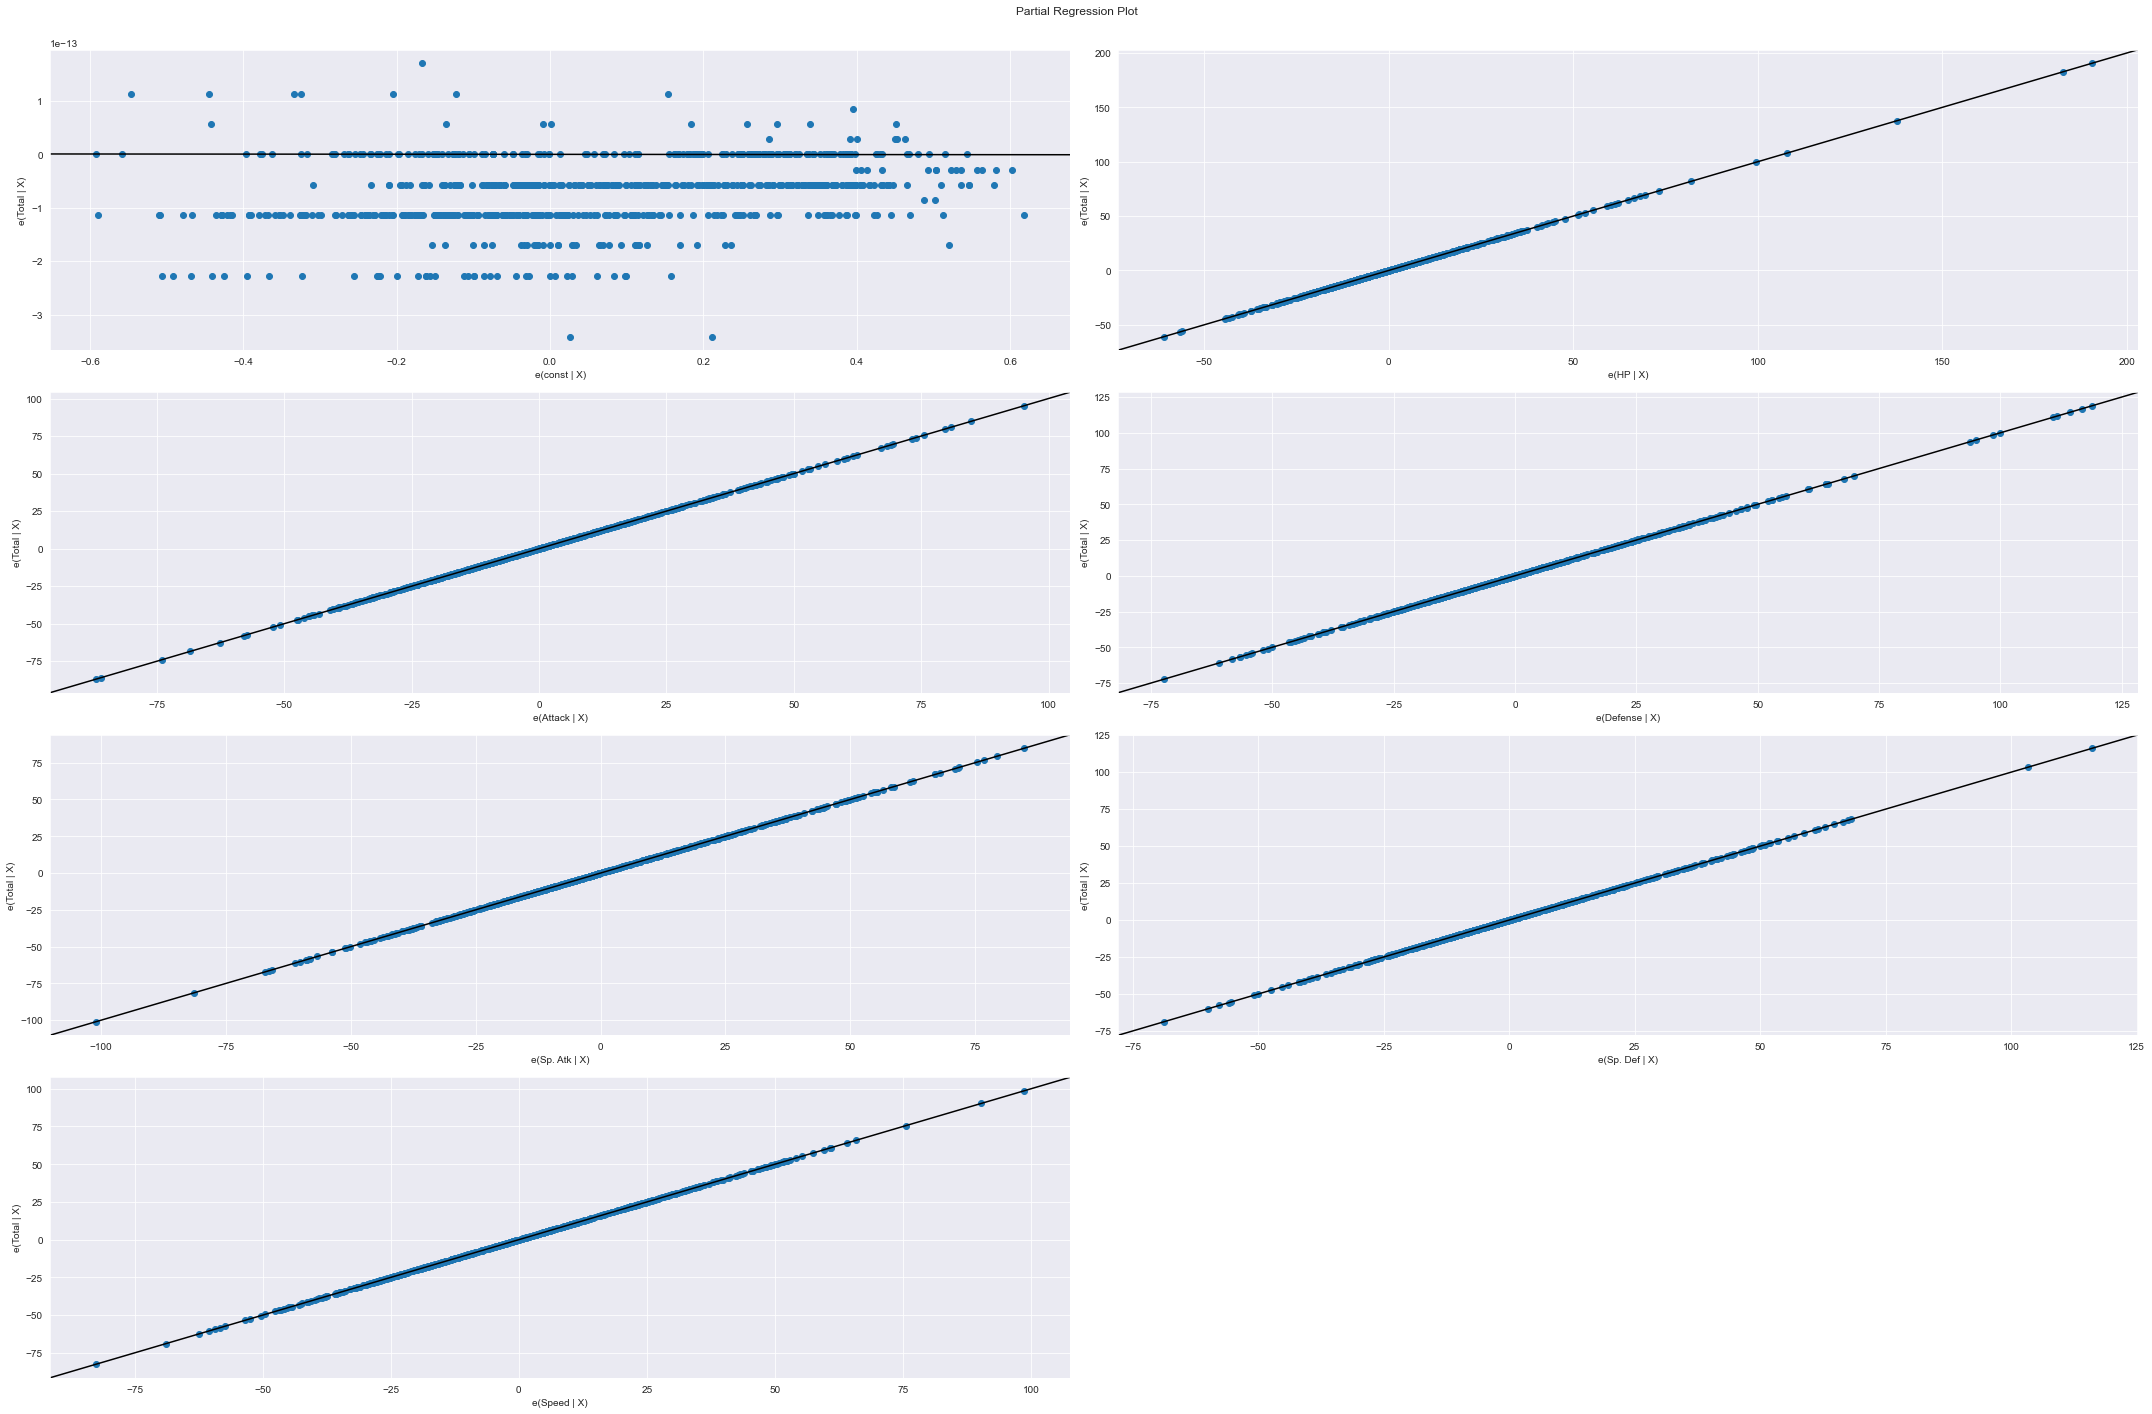

In [43]:
fig = plt.figure(figsize=(30,20))
sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


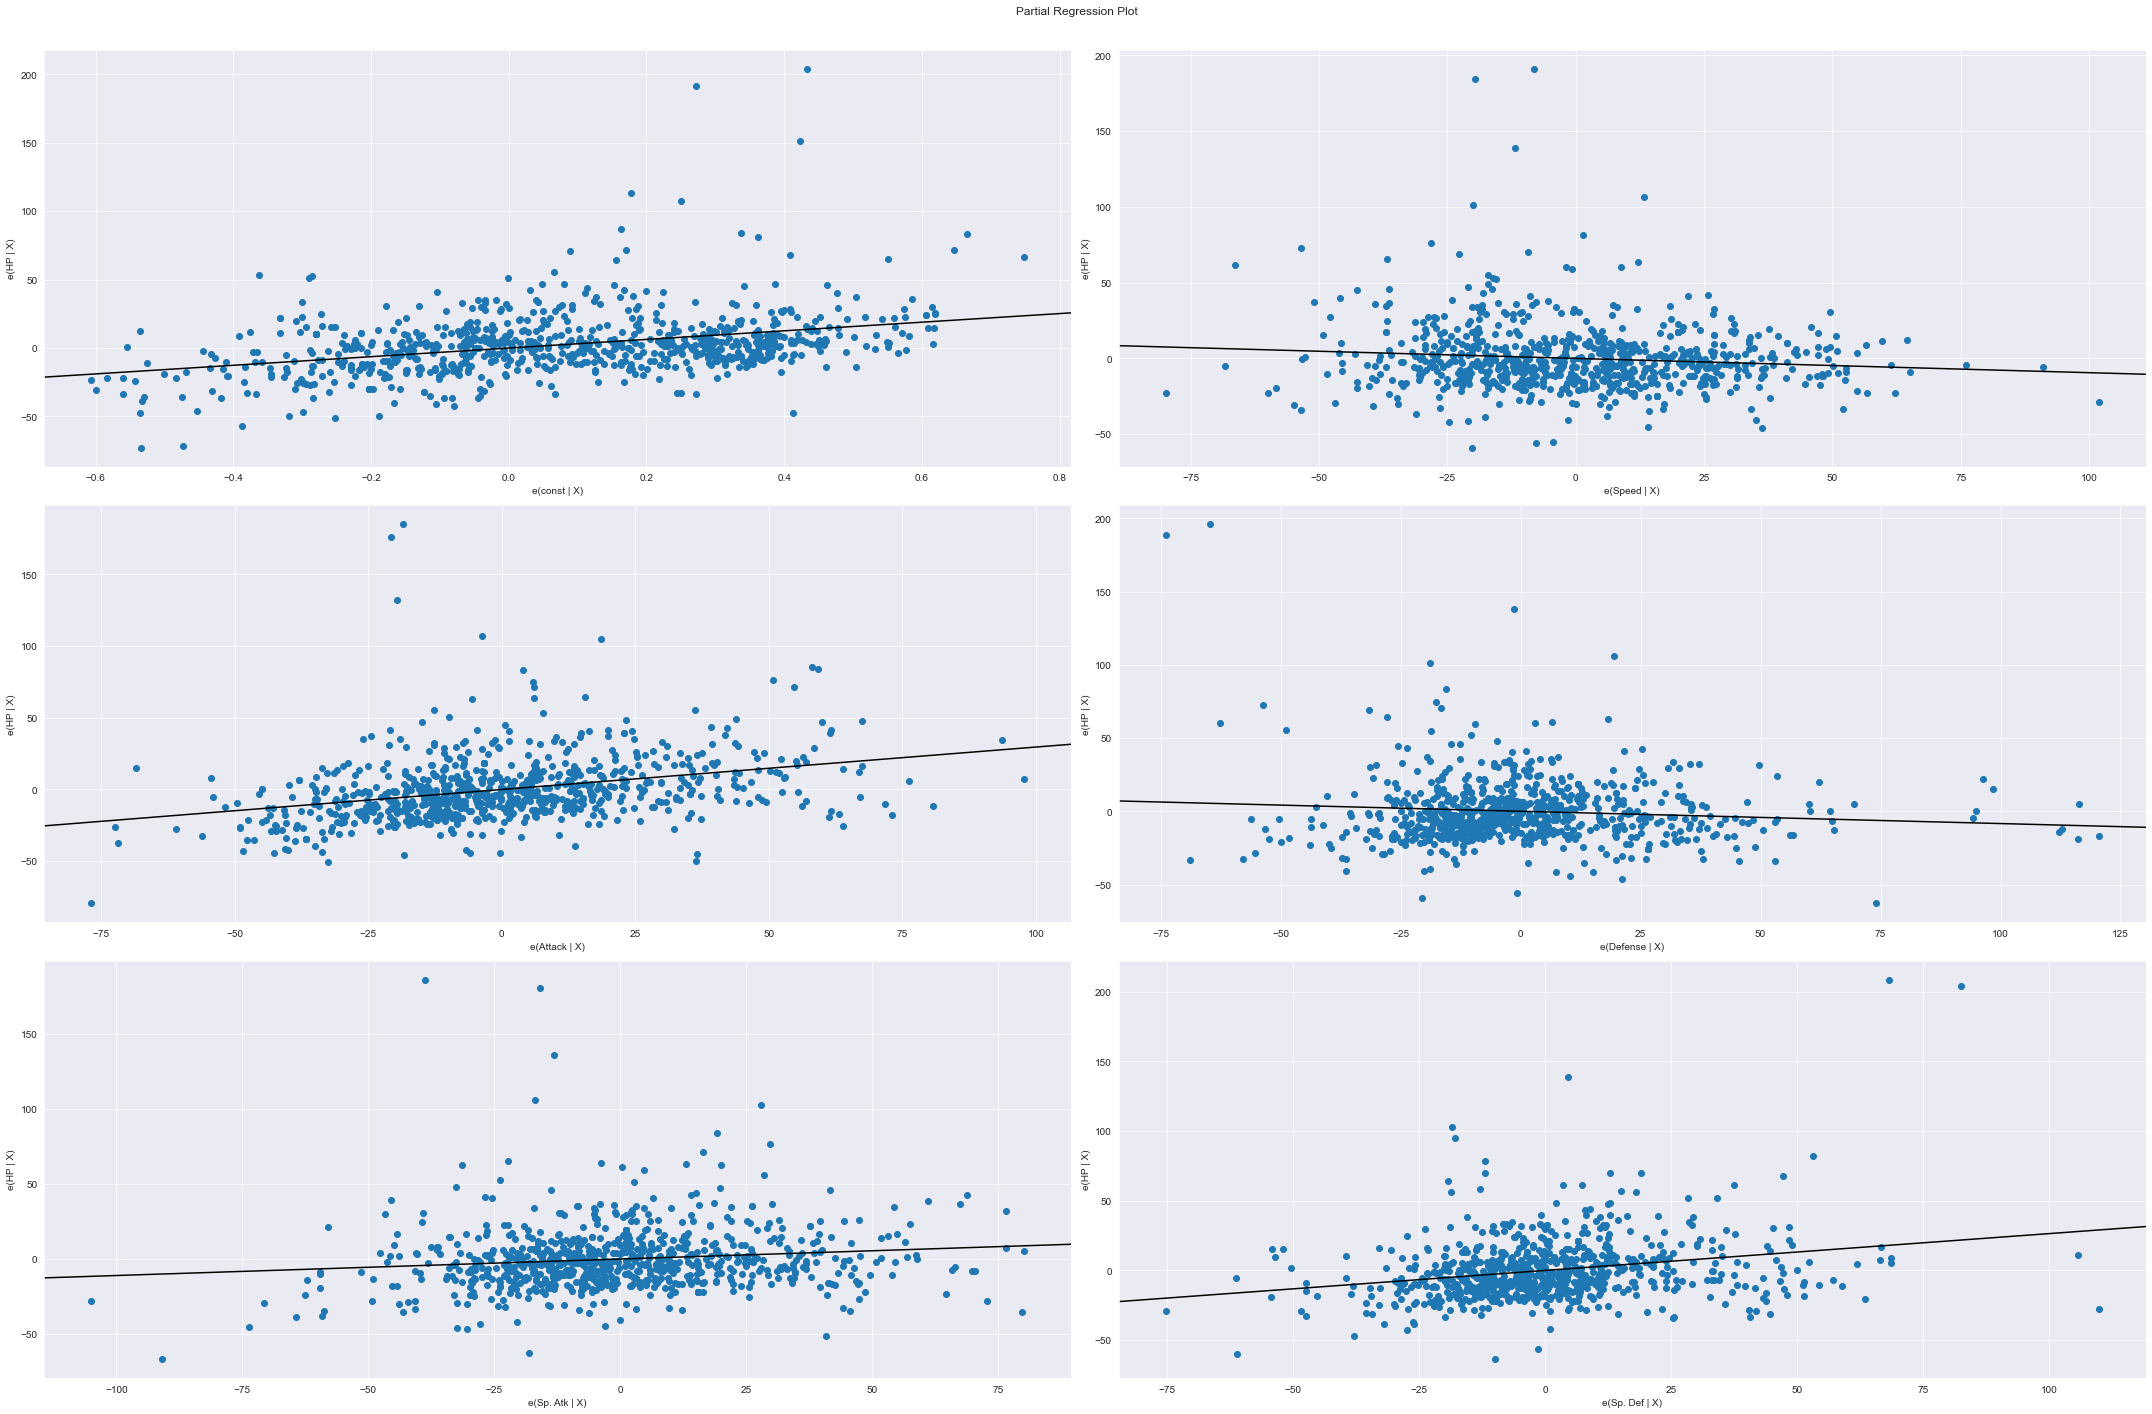

In [44]:
fig = plt.figure(figsize=(30,20))
sm.graphics.plot_partregress_grid(model1,fig=fig)
plt.show()

In [127]:
Stargazer([model,model_leg,model1,model1_leg])

#model 1 i 2 do d więc bierzemy 3 i 4

In [128]:
Stargazer([model1,model1_leg])